In [10]:
# ! pip install streamlit
! pip install plotly

  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
from datetime import timedelta
import plotly.express as px
import sqlite3

pd.set_option('display.max_columns', 40)
# display max rows 75
pd.set_option('display.max_rows', 75)

Utiliser les tables parquets déjà dans le dossier data_sources_pyhon et pas la connection à sqlite3

In [ ]:

# # check des tables
# # Chemin vers SQLite, depuis le répertoire "update"
# database_path = "../sqlite/update/statistics.sqlite3"


# # Connexion à la base de données SQLite
# conn = sqlite3.connect(database_path)

# # Liste toutes les tables de la base de données
# query = "SELECT name FROM sqlite_master WHERE type='table';"
# tables = pd.read_sql(query, conn)

# # Charger une table de la base de données dans un df pandas
# book = 'book'
# df_book_new = pd.read_sql(f"SELECT * FROM {book};", conn)
# sqlite_sequence = 'sqlite_sequence'
# sqlite_sequence_table = pd.read_sql(f"SELECT * FROM {sqlite_sequence};", conn)
# numbers = 'numbers'
# numbers_table = pd.read_sql(f"SELECT * FROM {numbers};", conn)
# page_stat_data = "page_stat_data"
# df_page_stat_data = pd.read_sql(f"SELECT * FROM {page_stat_data};", conn)
# # print le nombre de ligne de df_book_new
# print("Nombre de lignes de df_book_new : ", df_book_new.shape[0])
# # print le nombre de ligne de df_page_stat_data
# print("Nombre de lignes de df_page_stat_data : ", df_page_stat_data.shape[0])

# # fermer de la connexion à la base de données
# conn.close()

Nombre de lignes de df_book_new :  60
Nombre de lignes de df_page_stat_data :  20085


In [ ]:
# print(tables)

              name
0             book
1  sqlite_sequence
2   page_stat_data
3          numbers


Pour reprendre en route, possible de récupérer directement la verion du dataset depuis les fichiers parquets

In [3]:
# df_book = pd.read_parquet('df_book.parquet')
df_book_updated = pd.read_parquet('../data_sources_from_python/df_book_updated.parquet')
# df_book_streamlit = pd.read_parquet("df_book_streamlit.parquet")
df_stat = pd.read_parquet('../data_sources_from_python/stats_lecture.parquet')


In [4]:
df_stat.sort_values(by='heure de début', ascending=False).head(5)

,id_book,page,heure de début,Temps passé sur la page en seconde,total_pages,id_long,Temps de lecture en minute,Temps de lecture en heure,date lecture,Heure de début de lecture,Heure,Heure en décimal,Jour Précédent,Est Consécutif,date de fin de lecture
20387,79,21,2024-12-01 11:44:20,74,515,00079,1.233333,0.020556,2024-12-01,11:44:20,11,11.733333,2024-11-30,False,2024-12-01
20386,79,20,2024-11-29 21:54:04,26,515,00079,0.433333,0.007222,2024-11-29,21:54:04,21,21.900000,2024-11-28,True,2024-12-01
20385,79,19,2024-11-29 21:53:57,7,515,00079,0.116667,0.001944,2024-11-29,21:53:57,21,21.883333,2024-11-28,True,2024-12-01
20384,79,18,2024-11-29 21:53:16,41,515,00079,0.683333,0.011389,2024-11-29,21:53:16,21,21.883333,2024-11-28,True,2024-12-01
20383,79,17,2024-11-29 21:52:45,31,515,00079,0.516667,0.008611,2024-11-29,21:52:45,21,21.866667,2024-11-28,True,2024-12-01


# visuel 1 : table avec la liste des livres lus dans l'année. --> DONE
## step 1 : easy
* trié du plus récent au plus ancien 
* uniquement les livres lus en entier

## step 2 : 
* Récupérer le nombre de jour de lecture pour chaque livre 
* calculer le nombre de pages lues par jour de lecture
* calculer le nombre d'heures de lecture par jour de lecture
* calculer la vitesse de lecture : page /min

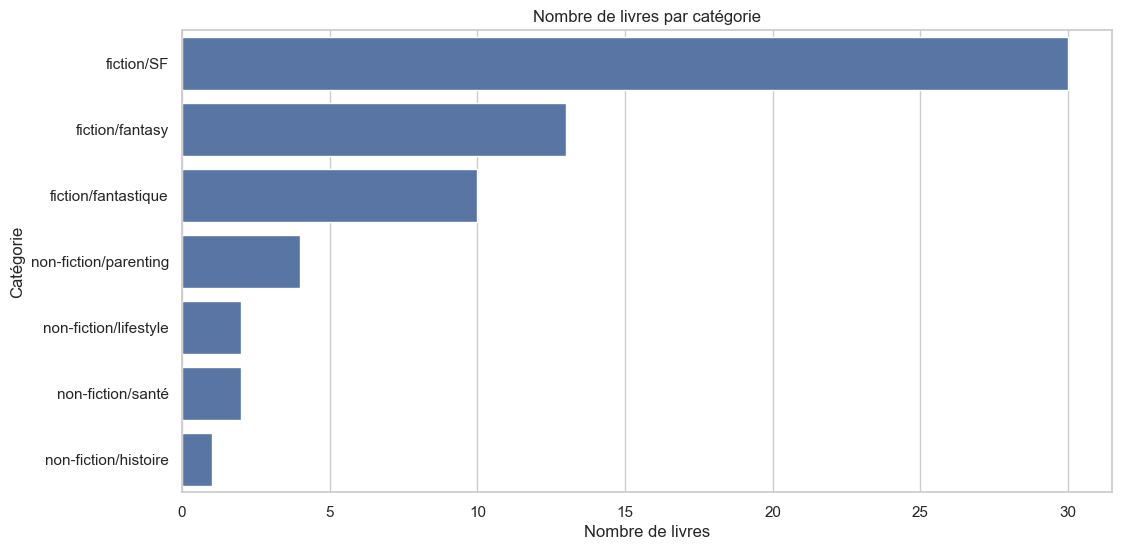

In [6]:
# plot avec seaborn en bar chhat le nombre de livre par categorie

#TODO 1 couleur par categorie principale "fiction" ou "non-fiction"


sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='Catégorie', data=df_book_updated, order=df_book_updated['Catégorie'].value_counts().index)
plt.title('Nombre de livres par catégorie')
plt.xlabel('Nombre de livres')
plt.ylabel('Catégorie')
plt.show()

In [7]:
# Calculer le nombre de livres par catégorie
category_counts = df_book_updated['Catégorie'].value_counts().reset_index()
category_counts.columns = ['Catégorie', 'nombre de livre']
category_counts_sorted = category_counts.sort_values(by='nombre de livre', ascending=True)

# Créer un graphique à barres horizontal
fig = px.bar(category_counts_sorted,
             x='nombre de livre', 
             y='Catégorie',
             orientation='h',  # 'h' indique un bar chart horizontal
             title='Nombre de livres par catégorie',
             labels={'nombre de livre': 'Nombre de livres', 'Catégorie': 'Catégories'})

# Afficher le graphique
fig.show()

# visuel 2
heatmap heure de lecture et calendrier
https://plotly.com/python/heatmaps/
A retravailler mais on est pas loin


sinon : 
https://python.plainenglish.io/interactive-calendar-heatmaps-with-plotly-the-easieast-way-youll-find-5fc322125db7
Mais ça rend moche

In [ ]:
# ! pip install plotly_calplot 

  Attempting uninstall: pytz
    Found existing installation: pytz 2024.2
    Uninstalling pytz-2024.2:
      Successfully uninstalled pytz-2024.2



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from plotly_calplot import calplot


# prendre uniquement les données de 2024 date de lecture
df_stat2 = df_stat[df_stat['heure de début'].dt.year == 2024]


fig = calplot(df_stat2, x="date lecture", y="Temps de lecture en minute")
fig.show()

d:\6.dev\book_data_analysis\.venv\Lib\site-packages\plotly_calplot\calplot.py:159: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
! pip install calmap


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\chric\AppData\Local\Temp\ipykernel_14868\1789621246.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



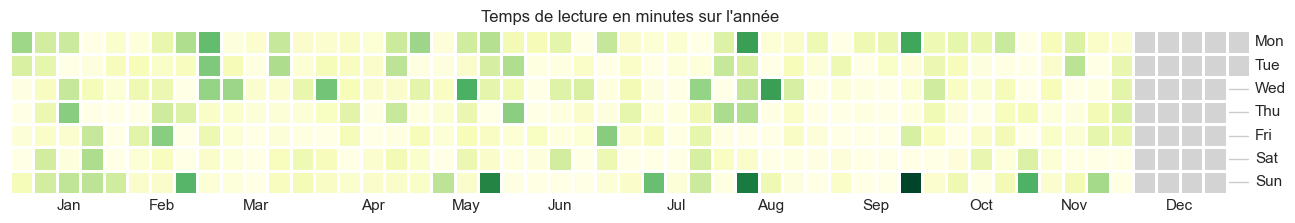

In [ ]:
import calmap
import matplotlib.pyplot as plt
# passer df_stat2['date lecture'] en dt time
df_stat2['date lecture'] = pd.to_datetime(df_stat2['date lecture'])
df_aggregated = df_stat2.groupby('date lecture')['Temps de lecture en minute'].sum().reset_index()
df_serie = df_aggregated.set_index('date lecture')['Temps de lecture en minute']

# Remplir les dates manquantes avec 0
df_serie = df_serie.asfreq('D', fill_value=0)



plt.figure(figsize=(16, 10))
calmap.yearplot(
    df_serie,
    year=df_serie.index.year[0],
    fillcolor='lightgrey',
    cmap='YlGn',
    linewidth=2,
    dayticks = True
    )

plt.title('Temps de lecture en minutes sur l\'année')
plt.show()


# 3 score card
* plus longue lecture : heure de lecture max
* le plus régulier : jour de lecture = intervalle de lecture
* plus rapide : page lues à la minute
* plus addictif : pages lues par jour

## plus longue lecture

In [9]:
# le temps de lecture max
temps_maxi = df_book_streamlit[df_book_streamlit["temps passé sur le livre en heure"] == df_book_streamlit["temps passé sur le livre en heure"].max()]

# prisme livre
titre_max_temps_lecture = df_book_streamlit[df_book_streamlit["temps passé sur le livre en heure"] == df_book_streamlit["temps passé sur le livre en heure"].max()]["Titre"].values[0]
auteur_max_temps_lecture = df_book_streamlit[df_book_streamlit["temps passé sur le livre en heure"] == df_book_streamlit["temps passé sur le livre en heure"].max()]["Auteurs"].values[0]
temps_max_lecture = df_book_streamlit["temps passé sur le livre en heure"].max()


print(f"Livre le plus long à lire : {titre_max_temps_lecture} de {auteur_max_temps_lecture} : {temps_max_lecture}")


Livre le plus long à lire : La Chute d'Hypérion: Le cycle d'Hypérion - Tome 2 de Dan Simmons : 13.3


## plus régulier
Trop de livre dans cette liste

In [50]:
# Afficher les livres ou la durée de lecture est égale à la durée de lecture effective
# df_book_streamlit[df_book_streamlit["jours de lecture effectifs (jl)"] == df_book_streamlit["Durée lecture (j)"]][["Titre", "Durée lecture (j)", "jours de lecture effectifs (jl)"]]

# Compter le nombre de lignes où "jours de lecture effectifs (jl)" est égal à "Durée lecture (j)"
count = df_book_streamlit[df_book_streamlit["jours de lecture effectifs (jl)"] == df_book_streamlit["Durée lecture (j)"]].shape[0]

# affiche le dernier, puis l'avant dernier, puis l'avant avant dernier
df_book_streamlit[df_book_streamlit["jours de lecture effectifs (jl)"] == df_book_streamlit["Durée lecture (j)"]].sort_values(by="Date de lecture", ascending
=False).head(3)[["Titre", "Durée lecture (j)", "jours de lecture effectifs (jl)", "Date de lecture"]]
# enregistre les 3 titres dans une liste
liste_livres = df_book_streamlit[df_book_streamlit["jours de lecture effectifs (jl)"] == df_book_streamlit["Durée lecture (j)"]].sort_values(by="Date de lecture", ascending   =False).head(3)["Titre"].values


print(f"{count} livres lus tous les jours, les 3 derniers : {liste_livres}")


27 livres lus tous les jours, les 3 derniers : ["Projet secret T2 : Manuel de Survie du Sorcier Frugal dans l'Angleterre médiévale"
 'Voyageur 2 : Libration'
 "Blackwater 1 - La crue: L'épique saga de la famille Caskey"]


## le plus rapide
Utiliser le df non filtré

In [55]:
livre_rapide = df_book_updated[df_book_updated["temps passé sur le livre en minute"] > 35]
livre_rapide = livre_rapide[livre_rapide["pages lues à la minute"] == livre_rapide["pages lues à la minute"].max()]

titre_livre_rapide = livre_rapide[livre_rapide["pages lues à la minute"] == livre_rapide["pages lues à la minute"].max()]["Titre"].values[0]
auteur_livre_rapide =livre_rapide[livre_rapide["pages lues à la minute"] == livre_rapide["pages lues à la minute"].max()]["Auteurs"].values[0]
vitesse_livre_rapide =livre_rapide[livre_rapide["pages lues à la minute"] == livre_rapide["pages lues à la minute"].max()]["pages lues à la minute"].values[0].round(1)


# titre_max_temps_lecture = df_book_streamlit[df_book_streamlit["Temps de lecture total (hh:mm:ss)"] == df_book_streamlit["Temps de lecture total (hh:mm:ss)"].max()]["Titre"].values[0]
# auteur_max_temps_lecture = df_book_streamlit[df_book_streamlit["Temps de lecture total (hh:mm:ss)"] == df_book_streamlit["Temps de lecture total (hh:mm:ss)"].max()]["Auteurs"].values[0]
# temps_max_lecture = df_book_streamlit["Temps de lecture total (hh:mm:ss)"].max()



print(f"Livre lu avec la vitessse max : {titre_livre_rapide} de {auteur_livre_rapide} à {vitesse_livre_rapide} pages à la minute")



Livre lu avec la vitessse max : la route de Cormac McCarthy à 2.0 pages à la minute


## plus addictif : max moyenne pages lues par jour

In [56]:
livre_addict = df_book_updated[df_book_updated["minutes_lecture_par_jour_de_lecture"] == df_book_updated["minutes_lecture_par_jour_de_lecture"].max()]
titre_livre_addict = livre_addict["Titre"].values[0]
auteur_livre_addict = livre_addict["Auteurs"].values[0]
minutes_livre_addict = livre_addict["minutes_lecture_par_jour_de_lecture"].values[0]

print(f"Livre lu avec la moyenne de temps de lecture par jour la plus élevée : {titre_livre_addict} de {auteur_livre_addict} avec {minutes_livre_addict} minutes de lecture par jour")

Livre lu avec la moyenne de temps de lecture par jour la plus élevée : la route de Cormac McCarthy avec 93.7 minutes de lecture par jour


## les stats depuis le prisme inversé : pic de vitesse (date et livre), page lu en 1 journée (date et livre), heure de lecture max en 1 journée (date et livre)

### 1. Heure de lecture max dans la journée

Solution : 

Faire un group by, date lecture : 
* sum : temps passé sur la page
* sum id_book
* concatenate la liste des id_book de chaque ligne ? (ou les titres de livre directement)


--> Permet d'identifier le jour avec le plus longtemps en lecture, et les livres identifiés

In [110]:
# Convertir la colonne 'date lecture' en datetime
df_stat['date lecture'] = pd.to_datetime(df_stat['date lecture'], format='%Y-%m-%d')

# Joindre df_stat avec df_book_updated pour inclure le nom des livres
df_stat2 = df_stat.merge(df_book_updated, left_on='id_book', right_on='id', how='left')

# Agréger les données par 'date lecture'
agg_data = df_stat2.groupby('date lecture').agg({
    'Temps de lecture en minute': 'sum',
    'page': 'nunique',
    'id_book': 'nunique'
}).reset_index()

# Ajouter la liste des id_book et des titres pour chaque date de lecture
book_ids_titles_by_date = df_stat2.groupby('date lecture').apply(
    lambda x: ', '.join(sorted(set(f"{row['id_book']} ({row['Titre']})" for _, row in x.iterrows())))
).reset_index()

# Fusionner les deux DataFrames
merged_data = pd.merge(agg_data, book_ids_titles_by_date, on='date lecture')

# Renommer pour plus de clarté
merged_data.columns = ['date lecture', 'Temps de lecture en minute', 'Nombre de pages', 'Nombre de livres', 'Books']

# Afficher le résultat
print(merged_data)

    date lecture  Temps de lecture en minute  Nombre de pages  \
0     2012-05-01                   36.900000               52   
1     2023-11-21                   33.833333               40   
2     2023-11-22                   21.166667               36   
3     2023-11-23                   91.300000              160   
4     2023-11-24                    9.500000               11   
..           ...                         ...              ...   
265   2024-11-02                   69.783333               92   
266   2024-11-03                  175.100000              237   
267   2024-11-04                   36.633333               69   
268   2024-11-05                   22.150000               31   
269   2024-11-06                    9.816667               15   

     Nombre de livres                                              Books  
0                   2  57 (Légendes et lattes), 58 (Roman secret 3 - ...  
1                   2          1 (nan), 2 (Le crime de l'Orient-Expre

C:\Users\chric\AppData\Local\Temp\ipykernel_21332\33408628.py:15: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
# print les 10 premières lignes, triées par 'Temps de lecture en minute' de manière décroissante
merged_data.sort_values('Temps de lecture en minute', ascending=False).head(3)

NameError: name 'merged_data' is not defined

### Pic de vitesse : 

Pic par heure et livres associés

In [114]:
# Ajouter les colonnes 'id_book' et 'Titre' avec valeurs uniques pour chaque groupe
def concatenate_unique_values(series):
    return ', '.join(sorted(set(map(str, series))))

books_info = df_stat2.groupby(['date lecture', 'Heure']).apply(
    lambda x: pd.Series({
        'id_books': concatenate_unique_values(x['id_book']),
        'Titres': concatenate_unique_values(x['Titre'])
    })
).reset_index()

# Fusionner les deux DataFrames
result = pd.merge(agg_data_pic_vitesse, books_info, on=['date lecture', 'Heure'])

# Renommer les colonnes pour plus de clarté (si nécessaire)
result.columns = ['date lecture', 'Heure', 'Nombre de pages', 'Temps passé sur la page en seconde', 'Temps de lecture en minute', 'id_books', 'Titres']

# Afficher le ré

C:\Users\chric\AppData\Local\Temp\ipykernel_21332\2549705109.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
result["page à la minute"] = (result["Nombre de pages"] / (result["Temps de lecture en minute"] )).round(2) 

# faire un head de result trié par page à la minute, uniquement quand page supérieur à 60
result[result["Nombre de pages"] > 60].sort_values(by='page à la minute', ascending=False).head(5)
# result.sort_values(by='page', ascending=False).head(10)

,date lecture,Heure,Nombre de pages,Temps passé sur la page en seconde,Temps de lecture en minute,id_books,Titres,page à la minute
240,2024-02-28,21,79,2123,35.383333,25,Le manuel de survie des parents,2.23
281,2024-03-19,0,100,2736,45.600000,32,la route,2.19
455,2024-05-21,16,73,2046,34.100000,39,Skyward T3 : Cytonique,2.14
451,2024-05-20,19,71,2037,33.950000,39,Skyward T3 : Cytonique,2.09
17,2023-11-23,12,63,1821,30.350000,2,Le crime de l'Orient-Express,2.08
599,2024-07-24,16,79,2336,38.933333,58,Roman secret 3 - Yumi et le peintre de cauchemars,2.03
612,2024-07-28,9,78,2306,38.433333,58,Roman secret 3 - Yumi et le peintre de cauchemars,2.03
608,2024-07-27,21,106,3166,52.766667,58,Roman secret 3 - Yumi et le peintre de cauchemars,2.01
280,2024-03-18,23,117,3593,59.883333,32,la route,1.95
772,2024-09-29,9,110,3407,56.783333,67,Voyageur 1 : L'Espace d'un an,1.94


<Axes: xlabel='Heure', ylabel='count'>

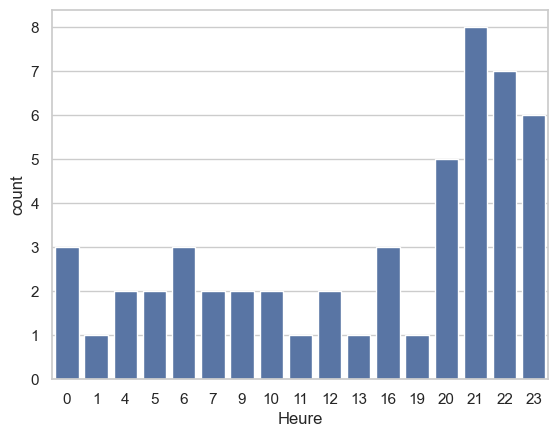

In [119]:
# plot le nombre de fois où chaque heure apparait pour "result[result["Nombre de pages"] > 60].sort_values(by='page à la minute', ascending=False).head(100)"
sns.countplot(x='Heure', data=result[result["Nombre de pages"] > 60].sort_values(by='page à la minute', ascending=False).head(100))

### nombre d'auteurs et nombres de livres lus

In [123]:
# print le nombre de lignes de df_book_updated
nb_livres_lus = df_book_streamlit.shape[0]
# print le nombre d'Auteurs lus de df_book_updated
nb_auteurs_lus = df_book_streamlit["Auteurs"].nunique()


print(f"{nb_livres_lus} livres lus, de {nb_auteurs_lus} auteurs différents")

56 livres lus, de 38 auteurs différents


# MATRICE PYTHON --> DONE

Exemple : 

In [3]:
# Créer une matrice 3x3 avec des étiquettes (labels)
data = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# Définir les noms des colonnes et des index (lignes)
columns = ['A', 'B', 'C']
index = ['R1', 'R2', 'R3']

# Créer le DataFrame
df = pd.DataFrame(data, columns=columns, index=index)

print(df)

    A  B  C
R1  1  2  3
R2  4  5  6
R3  7  8  9


In [3]:
df_book_updated = pd.read_parquet("../data_sources_from_python/df_book_updated.parquet")
# df_book_streamlit = pd.read_parquet("df_book_streamlit.parquet")
df_stat = pd.read_parquet("../data_sources_from_python/stats_lecture.parquet")
# préparer df_book_updated pour le filtre : 
df_book_updated['Date de lecture'] = pd.to_datetime(df_book_updated['Date de lecture'], format="%Y-%m-%dT%H:%M:%S.%fZ")
df_stat['Date de lecture en jour'] = pd.to_datetime(df_stat['date lecture'], format="%Y-%m-%d")

## Temps de lecture quotidien moyen

In [ ]:
# ===== MATRICE =====

# TEMPS DE LECTURE MOYEN

# Temps de lecture moyen par jour, distinct date de lecture en jour
temps_quotidien_moyen_ALL = df_stat["Temps passé sur la page en seconde"].sum() / df_stat["Date de lecture en jour"].nunique()/60 # c'est faux, il faudrait group by si c'est pour utilser mean
# Temps de lecture dernier jour (df_stat)
temps_quotidien_moyen_lastday = df_stat[df_stat["Date de lecture en jour"] == df_stat["Date de lecture en jour"].max()]["Temps passé sur la page en seconde"].sum()/60

# temps de lecture 3 derniers jours (df_stat)
temps_quotidien_moyen_3days_sum = (df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=3)]["Temps passé sur la page en seconde"].sum()/60).round(0)
temps_quotidien_moyen_3days = (df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=3)]["Temps passé sur la page en seconde"].sum()/60/3).round(0)
temps_quotidien_moyen_7days_sum = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=7)]["Temps passé sur la page en seconde"].sum()/60
temps_quotidien_moyen_7days = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=7)]["Temps passé sur la page en seconde"].sum()/60/7
temps_quotidien_moyen_30days_sum = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=30)]["Temps passé sur la page en seconde"].sum()/60
temps_quotidien_moyen_30days = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=30)]["Temps passé sur la page en seconde"].sum()/60/30
temps_quotidien_moyen_365days_glissants_sum = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=365)]["Temps passé sur la page en seconde"].sum()/60
temps_quotidien_moyen_365days_glissants = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=365)]["Temps passé sur la page en seconde"].sum()/60/365
temps_quotidien_moyen_this_year_sum = df_stat[df_stat["Date de lecture en jour"].dt.year == df_stat["Date de lecture en jour"].max().year]["Temps passé sur la page en seconde"].sum()/60
temps_quotidien_moyen_this_year = df_stat[df_stat["Date de lecture en jour"].dt.year == df_stat["Date de lecture en jour"].max().year]["Temps passé sur la page en seconde"].sum()/60/df_stat["Date de lecture en jour"].nunique()





# NOMBRE DE PAGE MOYEN
# faire un group by de df_stat par id_book et page
df_stat_grouped_nb_pages = df_stat.groupby(["id_book", "page"]).size().reset_index(name='count')
nombre_de_lignes = df_stat_grouped_nb_pages.shape[0]
pages_quotidien_moyen_ALL = nombre_de_lignes / df_stat["Date de lecture en jour"].nunique() # compte que les jours de lecture
pages_hebdo_moyen_ALL = nombre_de_lignes / df_stat["Date de lecture en jour"].nunique() * 7
pages_monthly_moyen_ALL = nombre_de_lignes / df_stat["Date de lecture en jour"].nunique() * 30
pages_quotidien_moyen_lastday = df_stat[df_stat["Date de lecture en jour"] == df_stat["Date de lecture en jour"].max()].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0]
pages_quotidien_moyen_3days_sum = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=3)].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0]
pages_quotidien_moyen_3days = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=3)].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0]/3
pages_quotidien_moyen_7days_sum = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=7)].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0]
pages_quotidien_moyen_7days = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=7)].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0]/7
pages_quotidien_moyen_30days_sum = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=30)].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0]
pages_quotidien_moyen_30days = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=30)].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0]/30
pages_quotidien_moyen_365days_glissants_sum = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=365)].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0]
pages_quotidien_moyen_365days_glissants = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=365)].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0]/365
pages_quotidien_moyen_this_year_sum = df_stat[df_stat["Date de lecture en jour"].dt.year == df_stat["Date de lecture en jour"].max().year].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0]
pages_quotidien_moyen_this_year = df_stat[df_stat["Date de lecture en jour"].dt.year == df_stat["Date de lecture en jour"].max().year].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0]/df_stat["Date de lecture en jour"].nunique()




print('ALL', 'Last day', 'moyenne 3 days', '3 days sum', 'moyenne 7 days', '7 days sum', 'moyenne 30 days', '30 days sum', 'moyenne 365 days glissants', '365 days glissants sum', 'moyenne this year', 'this year sum')

# vitesse de lecture
vitesse_lecture_ALL = nombre_de_lignes / df_stat["Temps passé sur la page en seconde"].sum() * 60*60
vitesse_lecture_lastday = df_stat[df_stat["Date de lecture en jour"] == df_stat["Date de lecture en jour"].max()].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0] / df_stat[df_stat["Date de lecture en jour"] == df_stat["Date de lecture en jour"].max()]["Temps passé sur la page en seconde"].sum() * 60*60
vitesse_lecture_3days = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=3)].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0] / df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=3)]["Temps passé sur la page en seconde"].sum() * 60*60
vitesse_lecture_7days = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=7)].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0] / df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=7)]["Temps passé sur la page en seconde"].sum() * 60*60
vitesse_lecture_30days = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=30)].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0] / df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=30)]["Temps passé sur la page en seconde"].sum() * 60*60
vitesse_lecture_365days_glissants = df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=365)].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0] / df_stat[df_stat["Date de lecture en jour"] > df_stat["Date de lecture en jour"].max() - timedelta(days=365)]["Temps passé sur la page en seconde"].sum() * 60*60
vitesse_lecture_this_year = df_stat[df_stat["Date de lecture en jour"].dt.year == df_stat["Date de lecture en jour"].max().year].groupby(["id_book", "page"]).size().reset_index(name='count').shape[0] / df_stat[df_stat["Date de lecture en jour"].dt.year == df_stat["Date de lecture en jour"].max().year]["Temps passé sur la page en seconde"].sum() * 3600


# matrice  12x2

data = [
    [temps_quotidien_moyen_ALL, temps_quotidien_moyen_lastday, temps_quotidien_moyen_3days, temps_quotidien_moyen_7days, temps_quotidien_moyen_30days, temps_quotidien_moyen_365days_glissants, temps_quotidien_moyen_this_year],
    [pages_quotidien_moyen_ALL, pages_quotidien_moyen_lastday, pages_quotidien_moyen_3days, pages_quotidien_moyen_7days, pages_quotidien_moyen_30days, pages_quotidien_moyen_365days_glissants, pages_quotidien_moyen_this_year],
    [vitesse_lecture_ALL, vitesse_lecture_lastday, vitesse_lecture_3days, vitesse_lecture_7days, vitesse_lecture_30days, vitesse_lecture_365days_glissants, vitesse_lecture_this_year]
]

# Définir les noms des colonnes et des index (lignes)
columns = ['All', 'Last day', '3 days',  '7 days',  '30 days',  '12 months',  'this year']
index = ['Average reading time (min)', 'Average daily pages read',"Average reading speed (pages/hour)"]
matrice = pd.DataFrame(data, columns=columns, index=index)
matrice = matrice.fillna(0)
matrice = matrice.astype(int)


# ====== fin matrice =====

ALL Last day moyenne 3 days 3 days sum moyenne 7 days 7 days sum moyenne 30 days 30 days sum moyenne 365 days glissants 365 days glissants sum moyenne this year this year sum


# VITESSE DE LECTURE DANS LE TEMPS

In [110]:
df_book_updated = pd.read_parquet("../data_sources_from_python/df_book_updated.parquet")
# df_book_streamlit = pd.read_parquet("df_book_streamlit.parquet")
df_stat = pd.read_parquet("../data_sources_from_python/stats_lecture.parquet")
# préparer df_book_updated pour le filtre : 
df_book_updated['Date de lecture'] = pd.to_datetime(df_book_updated['Date de lecture'], format="%Y-%m-%dT%H:%M:%S.%fZ")
df_stat['Date de lecture en jour'] = pd.to_datetime(df_stat['date lecture'], format="%Y-%m-%d")

In [96]:
df_stat_grouped_nb_pages = df_stat.groupby(["id_book", "page"]).size().reset_index(name='count')
nombre_de_lignes = df_stat_grouped_nb_pages.shape[0]
vitesse_lecture_ALL = nombre_de_lignes / df_stat["Temps passé sur la page en seconde"].sum() * 60*60

# line chart avec matplotlib, vitesse de lecture par jour


FOnctionne, mais un soucis sur le calcul, à vérifier : 

C:\Users\Christophe OLIVERES\AppData\Local\Temp\ipykernel_18164\629024097.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stat_2024['Heure de début de lecture complète'] = df_stat_2024.apply(


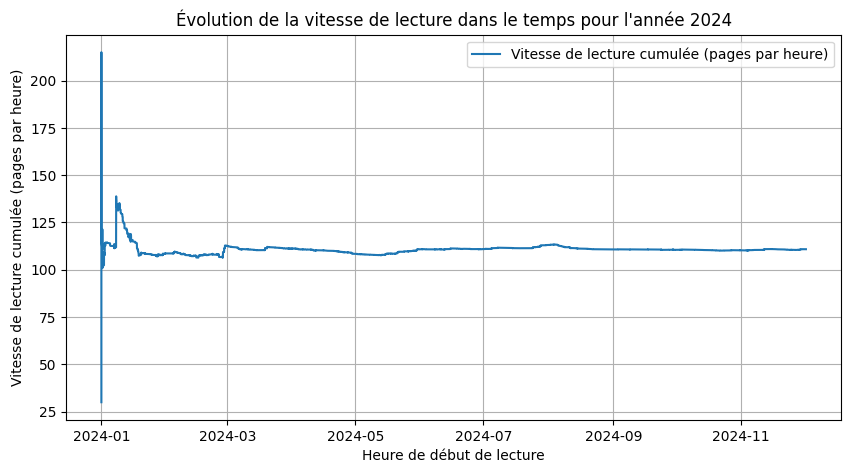

In [115]:
# Convert the 'Date de lecture en jour' and 'date lecture' to datetime
df_stat['Date de lecture en jour'] = pd.to_datetime(df_stat['Date de lecture en jour'])
df_stat['date lecture'] = pd.to_datetime(df_stat['date lecture'])

# Filtrer uniquement l'année 2024 à partir du 15.01/.2024
# df_stat_2024 = df_stat[(df_stat['Date de lecture en jour'].dt.year == 2024) & (df_stat['Date de lecture en jour'] >= '2024-01-31')]
df_stat_2024 = df_stat[df_stat['Date de lecture en jour'].dt.year == 2024]

# Combine the 'Date de lecture en jour' and 'Heure de début de lecture' to form complete datetime
df_stat_2024['Heure de début de lecture complète'] = df_stat_2024.apply(
    lambda row: pd.to_datetime(f"{row['Date de lecture en jour'].date()} {row['Heure de début de lecture']}"),
    axis=1
)

# Étape 1: Regrouper par 'id_book' et 'page', aggreger les 'Heure de début de lecture complète' et 'Temps passé sur la page en seconde'
df_stat_grouped = df_stat_2024.groupby(['id_book', 'page']).agg({
    'Heure de début de lecture complète': 'min',  # Nous utilisons 'min' ici pour obtenir le premier enregistrement de la plage de temps
    'Temps passé sur la page en seconde': 'sum'
}).reset_index()

# Étape 2: Calculer la vitesse de lecture
df_stat_grouped['Temps passé sur la page en heure'] = df_stat_grouped['Temps passé sur la page en seconde'] / 3600
df_stat_grouped['Vitesse de lecture (pages par heure)'] = 1 / df_stat_grouped['Temps passé sur la page en heure']

# Trier le DataFrame par 'Heure de début de lecture complète'
df_stat_sorted = df_stat_grouped.sort_values(by='Heure de début de lecture complète')

# Calculer la vitesse cumulée pour le line plot
df_stat_sorted['Vitesse cumulée (pages par heure)'] = df_stat_sorted['Vitesse de lecture (pages par heure)'].expanding().mean()

# Étape 3: Tracer la courbe avec matplotlib
plt.figure(figsize=(10, 5))
plt.plot(df_stat_sorted['Heure de début de lecture complète'], df_stat_sorted['Vitesse cumulée (pages par heure)'], label='Vitesse de lecture cumulée (pages par heure)')
plt.xlabel('Heure de début de lecture')
plt.ylabel('Vitesse de lecture cumulée (pages par heure)')
plt.title('Évolution de la vitesse de lecture dans le temps pour l\'année 2024')
plt.legend()
plt.grid(True)
plt.show()

In [109]:
df_stat_sorted.head()

,id_book,page,Heure de début de lecture complète,Temps passé sur la page en seconde,Temps passé sur la page en heure,Vitesse de lecture (pages par heure),Vitesse cumulée (pages par heure)
4,5,216,2024-01-01 00:00:04,120,0.033333,30.000000,30.000000
5,5,217,2024-01-01 00:04:32,9,0.002500,400.000000,215.000000
6,5,218,2024-01-01 00:04:44,98,0.027222,36.734694,155.578231
7,5,220,2024-01-01 00:06:26,20,0.005556,180.000000,161.683673
8,5,221,2024-01-01 00:06:46,37,0.010278,97.297297,148.806398
